<a href="https://colab.research.google.com/github/kweng2bing/CS220-Architecture-from-a-Programmer-Perspective/blob/main/CS220_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS220
 * https://www.youtube.com/playlist?list=PLUl4u3cNGP63VIBQVWguXxZZi0566y7Wf
 * https://www.cs.binghamton.edu/~tbartens/CS220_Fall_2023/

#X86 Assembly

Instruction set Architecture
* Registers & Memory Addressing modes
* Instructions
 * add, move, get
* Data Types
 * two complement binary, ascii char, float

##x86 Instruction Format
* Opcode
* Operand List
* Instruction Cycle


###x86 Instruction Format
Format: `<opcode> <operand_list>`

###Opcode
opcode - short mnemonic idenfiying the type of insturction


###Operand List
operand_list - 0, 1, 2, (rarely) 3 operand, seperated by commas
* Literal values - values specified as part of the instruction
 * **$10** in `add $10, %rax`
   * `$` = constant value
 * octal if preceded by 0; hex if by 0x
 * Single characters are enclosed in single quotes
   * including special characters such as `\n` `\t`
 * Strings are arrays of characters enclosed in double quotes
   * Include trailing null terminator
 * Labels may be used in place of address
* Registers - one of many internal registers available
  * **%rax** in `add $10, %rax`
* References to values in memory

  *  **$4(%rbx)** in `add $4(%rbx). %rax rax = rax + *(rbx + 4)`


Note: Typically, operands are sources and one operand might also be destination

```
addi      %edi,     %eax
(opcode)  (operand list...)
                      (destination)
```



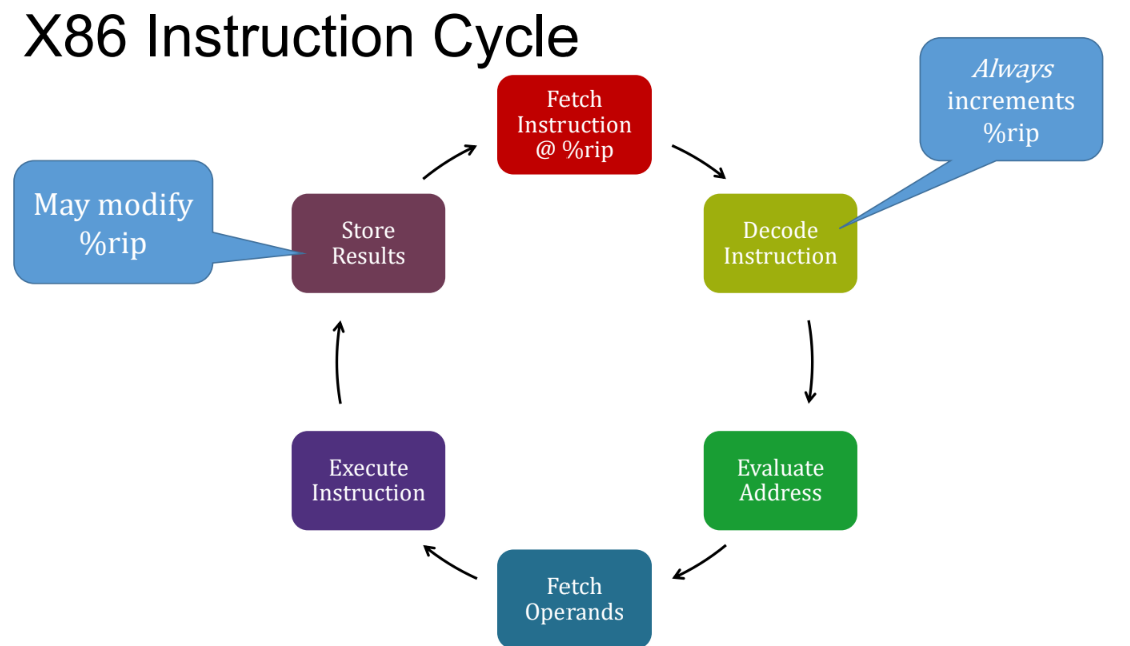

##Register Aliasing

###Register Aliasing

Register are aliased (having multiple names, which refer to overlapping bytes in the register)


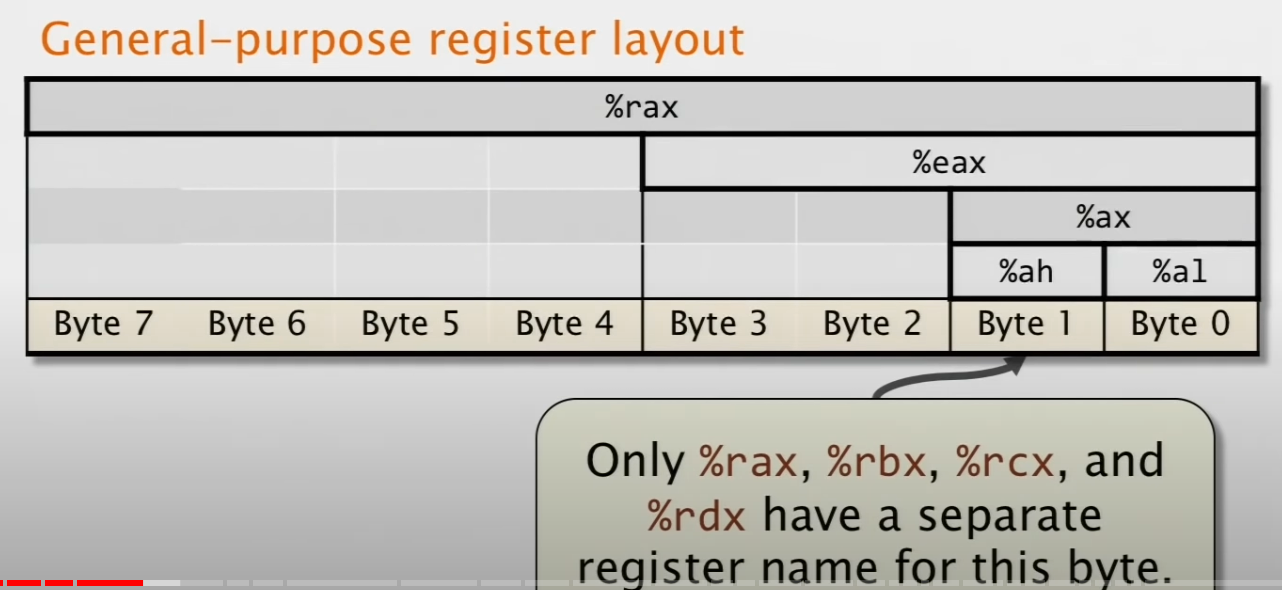

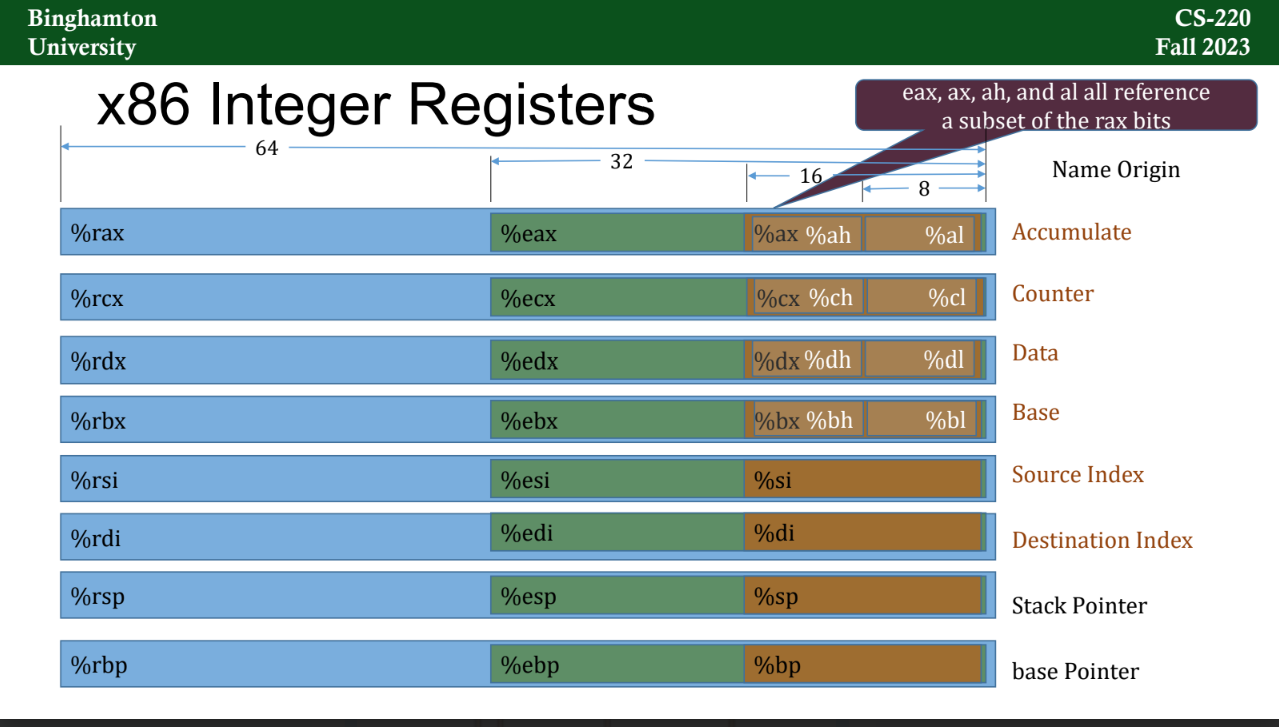

##AT&T vs Intel Syntax

###AT&T vs Intel Syntax

``` <op> A, B ```

AT&T Syntax:  B ← B \<op\> A
```
movl  $1,   %eax
addl  (%ebx, %ecx, 0x2),  %eax
subq  0x20(%rbx),   %rax
```
* Last argument is both the operand and result/target


Intel Syntax: A ← A \<op\> B
```
mov eax, 1
add eax, [ebx + ecx*2h]
sub rax, [rbx + 20h]
```
* First argument is the target

x86 Assembler Syntax

`[label]: [mnemonic] [arg1], [arg2] ...; [comment]`

Example: ` and %ebx, %eax; eax = eax & ebx`




## x86 Data
* x86 Data Types
* Data Width
* Opcode Suffixes
* Opcode Suffixes for extension
* Assembler Argument Generalities

###x86 Data Types
---
No type checking - Instruction/ context **implies data types**
* Arithmetic instructions treat operands as numbers
  * Different instructions for signed or unsigned
* If there is a register argument, it implies data width
* If neither argument is a register, opcode suffix required
 * `<op>b/w/l/q`

In binary there are four different opcodes for integer ADD:
* 0x80 - 8 bit (byte) add
* 0x66 - 16 bit (word) add
* 0x83 - 32 bit (long) add
* 0x48 - 64 bit (qword) add


###Opcode Suffixes
---
Opcodes might be augments with a suffix that describes the data type of the operation or a condition code
* Data movement, arithmetic, or logic uses single-character suffix to indicate the data type
* If the suffix is missing, it can be inferred from the size of operand registers

```
movq  -16(%rbp),  **bold text** %rax
    'q' represent quad = 8 bytes = 64 bits
```

###Assembler Argument Generalities
Arguments may be
* literal value
* register
* memory reference

Only **ONE** argument may be a memory reference!
 * if the last argument, memory can be both read and written
 * Optional argument prefixes
   * `%` - register: `mov 5,%eax`
   * `$` - constant value: `mov $5,%eax`


###Opcode Suffixes for extension

Zero Extension  `movzbl   %al, %edx`
* 'z' = zero

Sign Extention `movslq  %eax,  %rdx`
* 's' = sign

Note:  32-bit operations are implicitly zero-extended to 64-bit values unlike the results of 8 and 16-bit operations

##Addressing Modes/ `mov`
* Direct Addressing
* Indirect Addressing
* Base Indexed Scale Displacement


Note: Operands of an insturction specify values using a variety of addressing modes.
* At most one operand may specify a memory address

###`mov`
---
* Copies instead of moves
* Copies 1,2,4,8 bytes from arg1 to arg2
* overwrites/replaces target value
  * overwrites part of register explicitly addressed
   * Exception: updates of "long" (%e..) registers
   
   
```
        rax: 1122 3344 5566 7788
mov $0x12345678,%eax
        rax: 0000 0000 1234 5678

```
* Proagate the sign bit to the high order 32 bits


###Direct Addrressing mode
* Immediate: Use the specified value
 *  `movq $172, %rdi`
* Register: Use the value in the specified register
  *  `movq %rcx, %rdi`
* Direct memory: Use the value at the specified memory address
  * `movq 0x172, %rdi`

  
Note: To fetch something from memory- requires a few hundred cycles


###Indirect Addressing Modes
* Register indirect: The address is stored in the specified register.
 * `movq (%rax), %rdi`
* Register indexed: The address is a constant offset of the value in the specified register.
  * `moveq (%rax), %rdi`
* Instruction-pointer relative: The address is indexed relative to %rip
  * `movq 172(%rip). %rdi`
  * usually happens while running code & control


###Base Indexed Scale Displacement

The most general form of indirect.

Example: `movq 172(%rdi, %rdx, 8), %rax`
* Displacement = 172
* Base: %rdi(general purpose register)
* Index: %rdx (GPR)
* Scale: 8 (either 1, 2, 4, 8)

Addressing: Base + Index * Scale + Displacement

If unspecified, index and dispalcement defulat to 0 and scale defaults to 1.

Useful fot Reading C vectors

##Condition Code Registers
* ALU
* Implicit Setting
* Explicit Setting

###Condition Code Registers

ALU
* CF = Carry Flag
 * =1 if most significant bit overflows
* ZF = Zero Flag
 *  =1 if result bit = 0
* SF = Sign FLag
 *  =1 if leftmost result bit is 1(signed negative)
* OF = Overflow Flag
 *  =1 if result sign is incorrect




 ### Condition code (Implicity Setting)
 * Implicitly set by arithmetic operations
  * `sub b, a; a = a- b`


### Condition Codes (Explicit Setting)
* Explicitly set by compare instruction
  * `cmp b, a; a-b`
  * `test b, a; a&b`

##Load effective address

###Load effective address: (lea)
---
* Used for implicit pointers for arrays/structures, etc.
* Calculates address from first argument, and writes that address to second
* Sometimes used as a cheap register to register arithmetic using
base/offset or table address mode
* Example:
 * `lea $-0x1c(%rbp),%rax ; %rax = &counter`
 * `lea $3(,%rax,$2),%rax ; %rax = (%rax*2) + 3 `

##Jump Instruction

Jump Instructions

`jmp` and `j<condition>`, takes a label as their operand (identifes a location in the code).

Note: Labels can be symbols, exact addresses, or relative address

Indirect jump takes an indirect address as its operand

Examples
```
jmp *%eax (Unconditional)
jge  .L04
jge 5 <_fib+0x15>
```

`jmp target`
*  Updates `%rip` register using the value of the target operand
 * Default: add target to `%rip`
 * If we were allowed to modify `%rip`, this would be like: `add target,%rip`
 * Target may be positive (jump forward) or negative (jump backwards)
*Next instruction fetched will be at the updated `%rip`
 * Assumes `%rip` points at a valid instruction in executable memory
 * Alters sequential control flow!

###Unsigned Conditional Jump Mnemonics

`cmp b,a ; a-b without setting destination`

```
OpCode   Description    Implementation
je       jump if a==b   jump if ZF=1
jne      jump if a!=b   jump if ZF=0
ja       jump if a>b    jump if ZF=0 and CF=0
jae      jump if a>=b   jump if ZF=1 or CF=0
jb       jump if b>a    jump if ZF=0 and CF=1
jbe      jump if b>=a   jump if ZF=1 or CF=1
```

###Signed Conditional Jump Mnemonics

`cmp b,a ; a-b without setting destination`

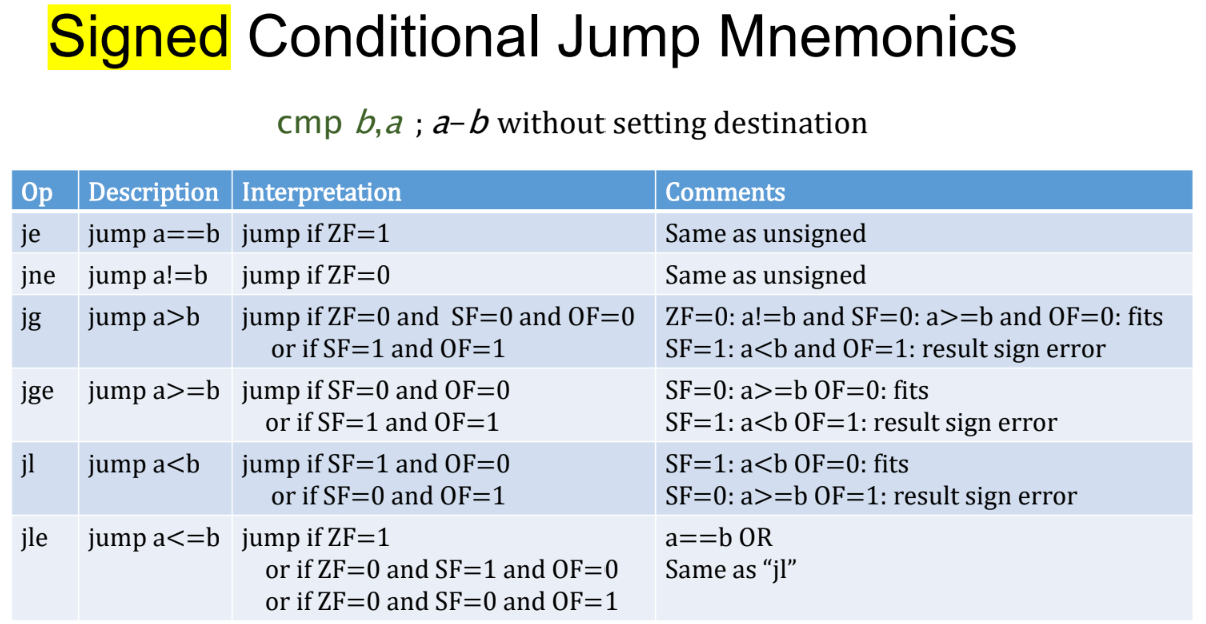

##Instruction Pointer Register

###Instruction Pointer Register `%rip`
* Internal register kept by the CPU, holds the address of the **next** instruction to be executed
* The size of a single address
  * On a 64 bit machine, %rip
  * on a 32 bit machine %eip
* Restricted access - cannot be written to by standard instructions, but may be read
* Some X86 instructions indirectly impact the value in %rip (jmp, call, ...)
* Contains the address of the next instruction to be executed!
* Always updated to point after the current instruction during instruction decode

##Stack
* Stack
* `push`
* `pop`
* Invocation Record
* "Red Zone"

###Stack
Stack segment stores data in memory to manage function calls and returns
* Local variables & function
* Function arguments
* Return address
* Intermediate results
* Register state

###Stack Etiquette
* Rule 1: Push first
* Rule 2: Everything I push, I will also pop

###`push`
```
Reg   Value
rsp   x7FFF FFFF FFFF FFF4
rax   x0000 0000 0000 000E
--------------------------------
push %eax --> sub $4, %rsp
              mov %eax, (%rsp)
----------------------------------
  xFFFF FFFC
  xFFFF FFF8 x0000 0004
->xFFFF FFF4 x0000 0003
  xFFFF FFF0
  xFFFF FFEC
```
1. Stack grows downward so need to subtract 4 from `%rsp` to get to the next space in stack
2. Then in that new space you can add the value in `%eax` to the stack

```
xFFFF FFFC
xFFFF FFF8 x0000 0004
xFFFF FFF4 x0000 0003
xFFFF FFF0 x0000 000E
xFFFF FFEC
```


###`pop`
```
Reg   Value
rsp   x7FFF FFFF FFFF FFF4
rax   x0000 0000 0000 000E
rbx   xbeef dead dead beef
---------------------------

pop %ebx -->    mov (%rsp), %ebx
                add $4, %rsp
--------------------------------
   xFFFF FFFC
   xFFFF FFF8 x0000 0004
   xFFFF FFF4 x0000 0003
-->xFFFF FFF0 x0000 000E
   xFFFF FFEC
```
1. Moves the value pointed by the stack pointer int %ebx
2. Move the stack pointer up

```
Reg   Value
rsp   x7FFF FFFF FFFF FFF4
rax   x0000 0000 0000 000E
rbx   x0000 0000 0000 000E

   xFFFF FFFC
   xFFFF FFF8 x0000 0004
-->xFFFF FFF4 x0000 0003
   xFFFF FFF0 x0000 000E
   xFFFF FFEC
```

###Invocation Record
* `%rbp` high @ of invocation record
* `%rsp` low @ of invocation record
* local vars are at higher addreess
 * Reference example: `-4(%rbp)`
* When a function is invoked, it's preamble pushes invocation specific information on the stack
* When a function returns, the function specific information is popped off the stack, and the stack is restored to caller's state
* The information associated with a function invocation is called an invocation record, or “stack frame”

###Red Zone
* 128 bytes (16 addresses) below `%rsp` (below stack)
* Operating system will not modify the red zone
* Any asynchronous interrupts may not modify the red zone!
* If this function does not invoke other functions (leaf function) it may use the red zone WITHOUT modifying `%rsp`
* If lower level functions were called, the red zone would get modified
* gcc uses the red zone for local variables, parameters, and saved registers for leaf functions
* Saves instructions to modify `%rsp` in entry and return

##Flow Control
* If-then-else
* While loop
* For loop
* Do while loop

###If-then-else

```
int xmpif(int a, int b){
  int c;
  if(a > b)
     c = a;
  else
    c =b;
  return c;
    
}
```

```
    pushq   %rbp
    movq    %rsp, %rbp
    movl    %edi, -20(%rbp)
    movl    %esi, -24(%rbp)
    movl    -20(%rbp), %eax
    cmpl    -24(%rbp), %eax
    jle     .L2
    movl    -20(%rbp), %eax
    movl    %eax, -4(%rbp)
    jmp     .L3
.L2 movl    -24(%rbp), %eax
    movl    %eax, -4(%rbp)
.L3 movl    -4(%rbp), %eax
    popq    %rbp
    ret
```
* Conditional & Unconditional jump within the assembly code
* Unconditional Opposite of .c file(jump if false)
  






###While loop

```
int xmpWhile(int a, int b){
  int c = 0;
  while(a < 10){
     c += b;
     a++;
  }
  return c;
    
}
```

```
    pushq   %rbp
    movq    %rsp, %rbp
    movl    %edi, -20(%rbp)
    movl    %esi, -24(%rbp)
    movl    $0, -4(%rbp)
    jmp     .L4
.L5 movl    -24(%rbp), %eax
    addl    %eax, -4(%rbp)
    addl    $1, -20(%rbp)
    cmpl    $9, -20(%rbp)
    jle     .L5
    popq    %rbp
    ret
```
* Unconditional jump within the assembly code followed by an conditional jump.

  

###For loop

```
int xmpWhile(int a, int b){
  int c = 0;
  while(a < 10){
     c += b;
     a++;
  }
  return c;
    
}
```

```
    pushq   %rbp
    movq    %rsp, %rbp
    movl    %edi, -20(%rbp)
    movl    %esi, -24(%rbp)
    movl    $0, -4(%rbp)
    jmp     .L4
.L5 movl    -24(%rbp), %eax
    addl    %eax, -4(%rbp)
    addl    $1, -20(%rbp)
    cmpl    $9, -20(%rbp)
    jle     .L5
    popq    %rbp
    ret
```
* Unconditional jump within the assembly code followed by an conditional jump.

  

```
switch(a) {
    case 10 : c=a; break;
    case 11: b++;
    case 12:
    case 13: c=a+b; break;
    case 14: c=a*b; break;
    case 15: c=a+2; break;
    default: c=0;
}
```

w/o jump table
```
        movl      -20(%rbp), %eax    ; put “a” in %eax register
        cmpl $10,%eax                ; set cc using %eax-10     
        je .L5                       ; ->L5 if a==10
        cmpl     $11,%eax            ; set cc using %eax-11
        je      .L7 ; -> L7 if a==11
        cmpl    $12, %eax            ; set cc using %eax-12
        je      .L8 ; -> L8 if a==12
        cmpl    $13,%eax            ; set cc using %eax-13
        je      .L8 ; -> L8 if a==13
        cmpl    $14,%eax            ; set cc using %eax-14
        je      .L9 ; -> L9 if a==14
        cmpl    $15,%eax            ; set cc using %eax-15
        je      .L10 ; -> L10 if a==15
.L4     movl    $0, -4(%rbp)       ; default, set c=0
.L5:    movl    -20(%rbp), %eax
        movl    %eax, -4(%rbp)
        jmp     .L11
.L7:    addl    $1, -24(%rbp)
.L8:    movl    -20(%rbp), %edx
        movl    -24(%rbp), %eax
        addl    %edx, %eax
        movl    %eax, -4(%rbp)
        jmp     .L11
.L9:    movl     -20(%rbp), %eax
        imull    -24(%rbp), %eax
        movl     %eax, -4(%rbp)
        jmp      .L11
.L10:   movl     -20(%rbp), %eax
        addl     $2, %eax
        movl     %eax, -4(%rbp)
        jmp      .L11
.L4:    movl     $0, -4(%rbp)
.L11

```

w/ jump table
```
        movl     -20(%rbp), %eax ; put “a” in %eax register
        subl      $10, %eax ; %eax-=10... index in jump table
        cmpl      $5, %eax ; Set condition based on %eax-5
        ja        .L4 ; -> default if %eax>5 OR %eax < 0
        movl      %eax, %eax ; %rax=%eax (zero high bits)
        movq      .L6(,%rax,8), %rax ; %rax=jumptable[%eax]
        jmp      *%rax ; Indirect jump to jumptable[%eax]
        ...
```
* Note: multiple jump b/c of the `break` statement

##Calling Convention
 * Application Binary Interface
 * Parameter passing conventions
 * Return Value Conventions
 * Control Flow Conventions
 * Register Modification Conventions
 * Calling Conventions
 * Example

###ISA “Application Binary Interface” (ABI)
* ABI Often includes Conventions for:
 * Register Usage (integer, floating point, vector)
 * Flag Usage
 * Interrupt and Exception Handling
 * Name mangling (for C++, etc.)
 * Code Relocation


###Parameter Passing Conventions

* Argument expression values are put into registers by the caller:
 * Arguments which don;t fit are pushed on the stack
* Parameters are read from these registers by the callee
 * Parameters which don't fit are read from caller's stack frame

 ```
 Parm 1    Parm 2    Parm 3    Parm 4    Parm 5    Parm 6
%rdi       %rsi      %rdx      %rcx      %r8      %r9
Arg 1      Arg 2     Arg 3     Arg 4     Arg 5     Arg 6
 ```

###Return Value Convention

* Callee will put return value in %rax before return
 * %rax, %eax, %ax, or %al, depending on the size of the returned type
* It is impossible to return a value larger than 64 bits in C
 * Built-in types –-all less than 64 bits
 * Pointers are 64 bits
 * Can't return an array
 * Exception is returning a structure
* Caller can read return value from %rax family after return

###Control Flow Conventions

* Caller will invoke using “callq” instruction
 * callq add ; Invoke add function
   * `pushq %rip`
   * `jmp add`
 * %rip points to instruction AFTER the callq instruction!
* Upon return, callee will invoke “retq” instruction
 * retq ; Return to caller
   * `popq %rip`
 * Next instruction will be the instruction after the callq instruction
 * Assumes stack conventions have been followed!

Note: This violates stack etiquette. Safe if everyone follows the rule

###x86 Register Modification Conventions

Non-volatile registers(Blue Registers)
* `%rbx, %rsp, %rbp, %r12-%r15`
* Caller may assume blue regs are not changed by the callee
  * If callee wants to use these registers:
    * On entry, save (push) the callers value in the callee invocation record
    * When returning, restore (pop) the callers value from the callee invocation record

Volatile registers (Red Registers)
* Caller may assume red regs may be changed by the callee
 * If caller wants to preserve these registers:
   * Before the call, save (push) their value on the caller's invocation record
   * After the call, restore (pop) their value from the caller's invocation record

###Calling Convention

Method in which funcitons in different object files coordinate their use of the stack and register state

Organize the stack into frames, where each function instantioaion gets a single frame of its own
* `%rbp` - points to **top** of stack frame
  * Callee pushes caller's %rbp value onto callee's stack on entry
  * Callee pops caller's %rbp value from callee's stack on return
* `%rsp` - points to **bottom** of stack frame
  * `%rsp` (stack pointer) is a special case
    * Caller's `%rsp` value is callee's `%rbp+8`
    * To restore caller's `%rsp`, just copy %rbp to `%rsp` before popping `%rbp`
    * If `%rbp==%rsp`, don't even need to copy
    * `leaveq` instruction restores both callers %rbp and %rsp
    * Never stored on stack because it can be derived from %rbp's value

`call` and `ret` insturctions use the stack and the instruction pointer `(%rip)` to manage function call
 * `call` - **pushes** `%rip` onto the stack and **jumps** to the operand
 * `ret` - **pops** `%rip` from the stack and returns to the caller

Caller - callee registers state conventions

* Callee-saved register: `%rbx, %rbp, %r12-%r15`
* Caller-saved register: remaining (`%rax, %rcx, %rdx, %rdi, %rsi, %r8, %r9, %r10, %r11`)

Note: If you know the length of each function's stack frame, keeping a pointer to both the top and the bottom of the stack frame is redundant.

Note: gcc parameter “-fomit-frame-pointer” removes use of %rbp, but then all references are relative to %rsp, which can change, so the code works, but becomes confusing

---
####Caller invocation of Callee

* If you need to maintain value in any of the caller saved (volatile, red) registers, push their values on the stack
 * Copy parameter values into parameter registers
 * Push parameters that don't fit in registers onto stack
 * Invoke callee with the `callq` instruction
   * Pushes return address onto stack
   * Puts address of callee's first instruction into `%rip`

####Callee Preamble

* Push caller's %rbp on stack
* Copy `%rsp` to `%rbp` -
 * Creates single entry stack frame that contains only callers %rbp
* If not a leaf function, subtract from `%rsp` (enlarge frame)
* If you need to use callee saved (non-volatile, blue) registers other
than `%rsp` and `%rbp`, push their value on the stack
* Copy register argument values from parameter registers
* Copy stacked argument values from caller's stack frame (%rbp+8,
16, 24, etc.) as required

####Callee's return

* Put return value in %rax
* Pop (restore) all callee saved (non-volatile, blue) registers that
were pushed by preamble
* Restore caller's stack frame with either “leave” (or `popq %rbp` if `%rsp==%rbp` already)
* Invoke `ret` instruction to pop return address off of stack, and put it in `%rip`

####Caller after return

* Save/use return value in `%rax`
* Pop any caller saved (volatile, red) registers pushed before the call


####Stack Frame Chaining

* %rbp->caller's %rbp->caller's caller's %rbp->...
 * Chain continues until the “main” function
 * %rbp when main is entered does NOT point to OS stack frame top

* If you know %rbp, you know where caller's %rsp is (%rbp+8)
 * Therefore, if we know %rbp and %rsp, we know the entire stack frame!
 * This is how gdb “where” works

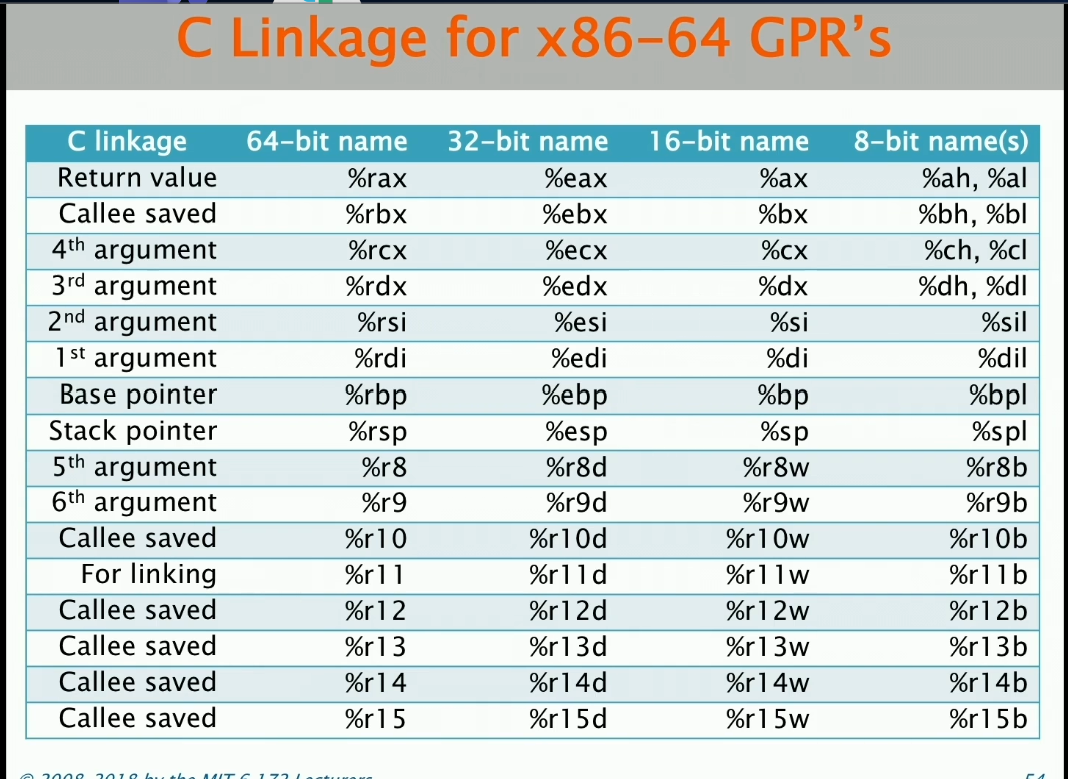

###Procedure
Suppose we have Function A calling Function B. Function B will be calling Function C
* Information about B
 * Above `%rbp` containst the linkage block( args from a to B)
   * Can be accessed by positive offset
 * A's return address is also sbove `%rbp`
 * `%rbp` pointing to base pointer
 * Below `%rbp` contains B's local pointer
1. Before calling C, B places nonregister arguments for C into the reserved linkage block it will share with C, which B access by indexing with negative offsets.
2.  B calls C, which saves the return address for B on the stack and transfers control to C
---
Function prologue
3.  Save B's base pointer on the stack
4.  Set `%rbp = %rsp`
5. Advance `%rsp` to allocate space for C's local variables and linkage block


Optimization: If a function never performs stack allocations except during function calls (`%rbp - %rsp` is a **compile-time constant**), indexing can be done off `%rsp`, and `%rbp` can be used as an orginary callee-saved register

In [ ]:
%%writefile fib.c
int64_t fib(int64_t n){
    if(n < 2)
      return n;
    return (fib(n-1) + fib(n-2));

}

Writing fib.c


Example
```
          .globl      _fib
          .p2align    4, 0x90
_fib      ## @fib
          pushq       %rbp
          movq        %rsp, %rbp
```
 * Calling convention for pushing `%rbp` and setting `%rbp`

```
          pushq       %r14
          pushq       %rbx
```
* Callee saved register. Restore them later

```
          movq        %rdi, %rbx
```

* `%rdi` stores the function argument n. Copy the incoming argument n into `%rbx`

```
          cmpq        $2, %rbx
```

* Does a comparision bt. 2 and n(`%rbx`)

```
          jge         LBB0_1

```
* Based on the Flags by the comparison jge may jump or not jump

```
          movq        %rbx, %rax
          jmp         LBB0_3

```
* Value moving into %rax b/c that is the value being returned

```
LBB0_1:   
          leaq        -1(%rbx) %rdi
```
* leaq - load effective address. Address calculation. adds -1 to `%rbx` and store into `%rdi`

```
          callq       _fib

```
* Calls the _fib function

```
          movq        %rax, %r14
```
* Get the return value (`%rax`) from the call and store it into `%r14`. Needs to store this value b/c another call to fib will occur

```
          addq        $-2, %rbx
          movq        %rbx, %rdi
          callq       _fib
          addq        %r14, %rax
```
* Steps for the second fib function and adds the two value

```
LBB0_3:
          popq        %rbx
          popq        %r14
          popq        %rbp
```
* Function epologue: restore the registers before exiting the functions

```
          retq    
```
* Return

##Miscellaneous
* Assembly Idiom

###Assembly Idiom
---

`xor %rax, %rax`
--> Zeros the register

---

`test A, B`

`test` computes the bitwise and of `A` and `B` and discards the result presesrving the RFlags
--> Checks to see whether the register is 0

Example:
```
test a , a
je  [falselabel]
; a must be true to get here
```
* Zero is "false", non-zero is "true"
* `test a, a` - computes a&a
  * If `a==0` then  `a&a ==0` and ZF=1
  * If `a!=0` then  `a&a !=0` and ZF=0
  *je branches only if ZF==1
